In [ ]:
import os
import pandas as pd
import numpy as np
import random
from tqdm import tqdm


from keras.layers import Input, Lambda, Dense
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_datasets as tfds

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
!pip install -q -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [ ]:
uri = open(".mongodb_token").read()

client = pymongo.MongoClient(uri)
db = client['heavymetals']
collection = db['heavymetals']

In [ ]:
df = pd.DataFrame(list(db.Fe_cor_indexes.find()))
df = df.dropna()
df['Fe']=df['Fe'].dropna().map(lambda x: classDef(x,Fe))

In [ ]:
Al = [200, 400, 800, 1200, 2500, 4000, 8000]
Fe = [250, 500, 1000, 1500, 2000, 3000, 4000]
V =  [0.5, 1, 2, 4, 6, 8, 10]
Ni = [1, 2, 3, 6, 9, 12, 15]
Cr = [1, 2, 3, 4, 6, 10, 15]
Pb = [1, 2, 4, 8, 12, 16, 20]
As = [0.1, 0.2, 0.4, 0.6, 0.9, 1.2, 1.6]

def classDef(x,metClassRange):
  for i in range(len(metClassRange)):
    if (x < metClassRange[i]):
      return i
    elif (x >= metClassRange[len(metClassRange)-1]):
      return len(metClassRange)

In [ ]:
df['Fe']=df['Fe'].dropna().map(lambda x: classDef(x,Fe))

In [ ]:
df

,LC_Type4,SWIRVZA,VNIRVZA,SAA,SZA,TIME,LST_Day_1km,Night_view_time,Day_view_time,B5,...,SZEN,VZEN,B11,B6,sur_refl_b07,BRDF_Albedo_Parameters_Band6_geo,BRDF_Albedo_Parameters_Band6_iso,BRDF_Albedo_Parameters_Band7_geo,BRDF_Albedo_Parameters_Band7_iso,Fe
0,6.0,73.0,73.0,108.0,77.5,699.0,14864.5,221.0,110.0,14950.419341,...,4656.777778,3699.500000,22827.816975,13805.278284,1396.500000,54.5,294.500000,44.0,184.5,1
1,6.0,73.0,73.0,108.0,77.5,700.0,15009.0,221.0,110.0,16227.613449,...,4638.583333,3693.500000,23251.804882,14170.123809,1687.500000,41.5,334.000000,31.0,208.5,2
2,6.0,72.0,72.0,109.0,78.0,701.0,14832.0,221.0,110.0,16225.441665,...,4691.875000,3656.500000,22635.824845,14423.536211,1354.500000,57.0,293.166667,39.0,170.5,0
3,2.0,73.0,73.0,109.0,79.0,701.0,14846.0,221.0,110.0,15969.163140,...,4656.250000,3648.541667,22468.118812,12886.915464,1032.000000,44.0,262.000000,33.0,142.0,1
4,4.0,72.0,72.0,109.0,79.0,702.0,14944.5,221.0,111.0,15577.268577,...,4595.142857,3599.250000,22547.717038,14246.689616,1336.102642,69.0,317.500000,46.0,184.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,1.0,55.0,55.0,115.0,119.0,573.0,13639.5,210.0,120.0,13201.465095,...,6093.250000,3725.666667,17121.741984,8567.513688,495.000000,12.5,130.500000,6.0,57.0,7
4584,1.0,55.0,55.0,116.0,119.0,574.0,13661.5,209.0,121.0,15632.825340,...,6104.000000,3539.285714,17349.935914,9699.876964,691.000000,26.0,211.500000,11.0,93.0,7
4585,1.0,52.5,53.0,116.0,118.5,577.0,13615.0,209.0,121.0,14191.578955,...,6220.250000,3822.166667,17169.377438,9159.969833,427.500000,14.5,123.000000,8.0,51.0,7
4586,1.0,52.0,52.0,117.0,120.0,579.0,13609.5,210.0,121.0,13294.281481,...,6158.250000,3236.000000,17305.457150,8760.299543,430.000000,17.0,139.500000,8.0,60.0,7


In [ ]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

dim_x = x.shape[1]
dim_y = len(set(y))

In [ ]:
unique, counts = np.unique(y, return_counts=True)
data = dict(zip(unique, counts))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

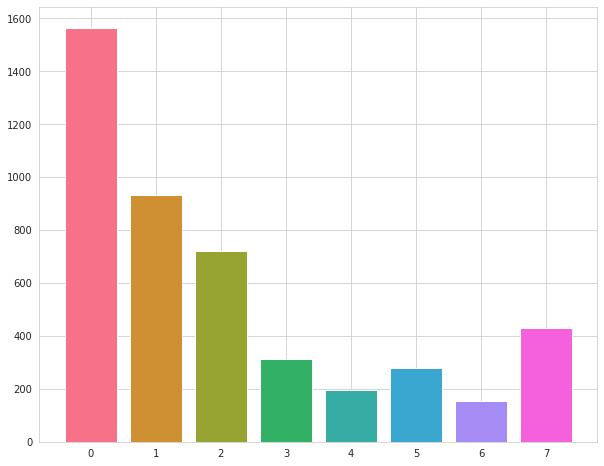

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ind = np.arange(len(data))
palette = sns.color_palette("husl", len(data))

plt.bar(ind, list(data.values()), color=palette)
plt.xticks(ind, list(data.keys()))
plt.show()

In [ ]:
# нормализация
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
# распределение на выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
# балансировка классов
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=2)
x, y = sm.fit_resample(x_train, y_train)

In [ ]:
def create_batch(batch_size=256):
    x_anchors = np.zeros((batch_size, 28))
    x_positives = np.zeros((batch_size, 28))
    x_negatives = np.zeros((batch_size, 28))
    
    for i in range(0, batch_size):
        random_index = random.randint(0, x_train.shape[0] - 1)
        x_anchor = x_train[random_index]
        y = y_train[random_index]
        
        indices_for_pos = np.squeeze(np.where(y_train == y))
        indices_for_neg = np.squeeze(np.where(y_train != y))
        
        x_positive = x_train[indices_for_pos[random.randint(0, len(indices_for_pos) - 1)]]
        x_negative = x_train[indices_for_neg[random.randint(0, len(indices_for_neg) - 1)]]
        
        x_anchors[i] = x_anchor
        x_positives[i] = x_positive
        x_negatives[i] = x_negative
        
    return [x_anchors, x_positives, x_negatives]

In [ ]:
emb_size = 128
embedding_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512,activation='relu',input_shape=(28,)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(emb_size, activation='sigmoid')
])

In [ ]:
def create_hard_batch(batch_size, num_hard, split = "train"):
    
    x_anchors = np.zeros((batch_size, 28))
    x_positives = np.zeros((batch_size, 28))
    x_negatives = np.zeros((batch_size, 28))
    y_out = np.zeros(batch_size)
    if split =="train":
        data = x_train
        data_y = y_train
    else:
        data = x_test
        data_y = y_test
    

    hard_batches = [] 
    batch_losses = []
    
    rand_batches = []
    

    for i in range(0, batch_size):
        hard_batches.append(create_batch(1, split))
        
        A_emb = embedding_model.predict(hard_batches[i][0])
        P_emb = embedding_model.predict(hard_batches[i][1])
        N_emb = embedding_model.predict(hard_batches[i][2])
        
        #  d(A, P) - d(A, N) 
        batch_losses.append(np.sum(np.square(A_emb-P_emb),axis=1) - np.sum(np.square(A_emb-N_emb),axis=1))
    
    
    hard_batch_selections = [x for _, x in sorted(zip(batch_losses,hard_batches), key=lambda x: x[0])]
    hard_batches = hard_batch_selections[:num_hard]
    
    # получение batch_size — количество случайных примеров num_hard
    num_rand = batch_size - num_hard
    for i in range(0, num_rand):
        rand_batch = create_batch(1, split)
        rand_batches.append(rand_batch)
    
    selections = hard_batches + rand_batches
    
    for i in range(0, len(selections)):
        x_anchors[i] = selections[i][0]
        x_positives[i] = selections[i][1]
        x_negatives[i] = selections[i][2]
        y_out[i] = selections[i][3]
        
    return [x_anchors, x_positives, x_negatives, y_out]

In [ ]:
def create_batch(batch_size=256, split = "train"):
    x_anchors = np.zeros((batch_size, 28))
    x_positives = np.zeros((batch_size, 28))
    x_negatives = np.zeros((batch_size, 28))

    y_out = np.zeros(batch_size) ##

    if split =="train":
        print('train')
        data = x_train
        data_y = y_train
    else:
        print('test')
        data = x_test
        data_y = y_test
    
    for i in tqdm(range(0, batch_size)):
        # поиск якоря, положительного и отрицательного примера
        random_index = random.randint(0, data.shape[0] - 1)
        x_anchor = data[random_index]
        y = data_y[random_index]
        
        indices_for_pos = np.squeeze(np.where(data_y == y))
        indices_for_neg = np.squeeze(np.where(data_y != y))
        
        x_positive = data[indices_for_pos[random.randint(0, len(indices_for_pos) - 1)]]
        x_negative = data[indices_for_neg[random.randint(0, len(indices_for_neg) - 1)]]
        
        x_anchors[i] = x_anchor
        x_positives[i] = x_positive
        x_negatives[i] = x_negative
        y_out[i] = y
        
    return [x_anchors, x_positives, x_negatives, y_out]

In [ ]:
y_train.shape

(9390,)

In [ ]:
y_test.shape

(3130,)

In [ ]:
train = create_batch(12000,'train')
val = create_batch(4000,'test')

train


100%|██████████| 12000/12000 [00:00<00:00, 12088.07it/s]


test


100%|██████████| 4000/4000 [00:00<00:00, 21737.16it/s]


In [ ]:
train = create_hard_batch(16000,5000)

In [ ]:
val = create_hard_batch(5000,2000,'test')

In [ ]:
unique, counts = np.unique(val[3], return_counts=True)
dict(zip(unique, counts))

{0.0: 484,
 1.0: 524,
 2.0: 509,
 3.0: 507,
 4.0: 495,
 5.0: 512,
 6.0: 464,
 7.0: 505}

In [ ]:
def identity_loss(y_true, y_pred):
    return K.mean(y_pred)

def triplet_loss(x, alpha = 0.4):
    anchor,positive,negative = x
    pos_dist = K.sum(K.square(anchor-positive),axis=1)
    neg_dist = K.sum(K.square(anchor-negative),axis=1)
    basic_loss = pos_dist-neg_dist+alpha
    loss = K.maximum(basic_loss,0.01) 
    return loss

In [ ]:
def embedding_model(emb_size=64):

  emb_size = 128
  embedding_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256,activation='relu',input_shape=(28,)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(emb_size, activation='softmax'),
  tf.keras.layers.Lambda(lambda x: K.l2_normalize(x,axis=-1))])

  return embedding_model

In [ ]:
def build_network(base_model):

  input_1 = Input(shape=(28,))
  input_2 = Input(shape=(28,))
  input_3 = Input(shape=(28,))

  A = base_model(input_1)
  P = base_model(input_2)
  N = base_model(input_3)

  loss = Lambda(triplet_loss)([A, P, N])
  model = Model(inputs = [input_1, input_2, input_3], outputs = loss)
  model.compile(loss = identity_loss, optimizer = Adam(0.001))
  return model

In [ ]:
def build_network(base_model):

  input_1 = Input(shape=(28,))
  input_2 = Input(shape=(28,))
  input_3 = Input(shape=(28,))

  A = base_model(input_1)
  P = base_model(input_2)
  N = base_model(input_3)

  loss = Lambda(triplet_loss)([A, P, N])
  # outputs = Dense(8, activation="softmax")(loss)
  model = Model(inputs = [input_1, input_2, input_3], outputs = loss)
  model.compile(loss = identity_loss, optimizer = Adam(0.001))
  return model

In [ ]:
outputs = Dense(1, activation="sigmoid")(distance)

In [ ]:
base_model = embedding_model()
model = build_network(base_model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 sequential_1 (Sequential)      (None, 128)          56832       ['input_1[0][0]',                
                                                                  'input_2[0][0]',            

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
history = model.fit( [train[0],train[1], train[2]], train[3].reshape(-1,1), epochs = 300, batch_size=64,
                    validation_data=( [val[0], val[1], val[2]], val[3].reshape(-1,1) ))

Epoch 1/300
188/188 [==============================] - 4s 14ms/step - loss: 0.3818 - val_loss: 0.3813
Epoch 2/300
188/188 [==============================] - 1s 6ms/step - loss: 0.3661 - val_loss: 0.3757
Epoch 3/300
188/188 [==============================] - 1s 6ms/step - loss: 0.3583 - val_loss: 0.3757
Epoch 4/300
188/188 [==============================] - 1s 6ms/step - loss: 0.3535 - val_loss: 0.3636
Epoch 5/300
188/188 [==============================] - 1s 6ms/step - loss: 0.3478 - val_loss: 0.3645
Epoch 6/300
188/188 [==============================] - 1s 6ms/step - loss: 0.3434 - val_loss: 0.3652
Epoch 7/300
188/188 [==============================] - 1s 6ms/step - loss: 0.3370 - val_loss: 0.3708
Epoch 8/300
188/188 [==============================] - 1s 6ms/step - loss: 0.3310 - val_loss: 0.3646
Epoch 9/300
188/188 [==============================] - 1s 6ms/step - loss: 0.3272 - val_loss: 0.3615
Epoch 10/300
188/188 [==============================] - 1s 6ms/step - loss: 0.3200 - val_l

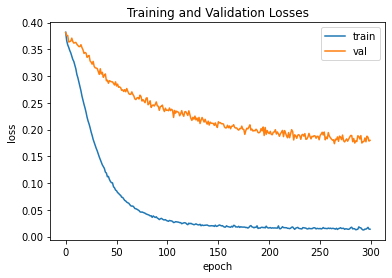

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Losses',size = 12)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

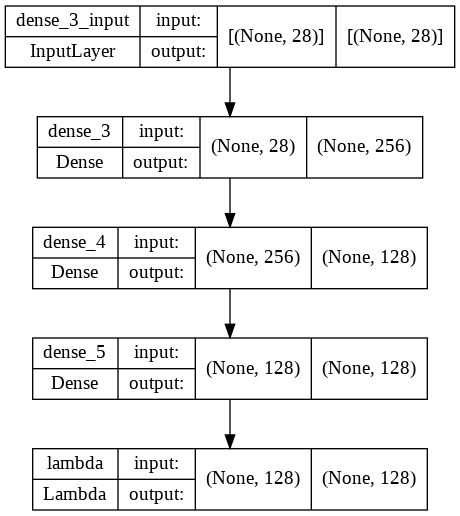

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(base_model,show_shapes=True, show_layer_names=True, to_file='model_summary_3x.png')

## Архитектура модели извлечения признаков

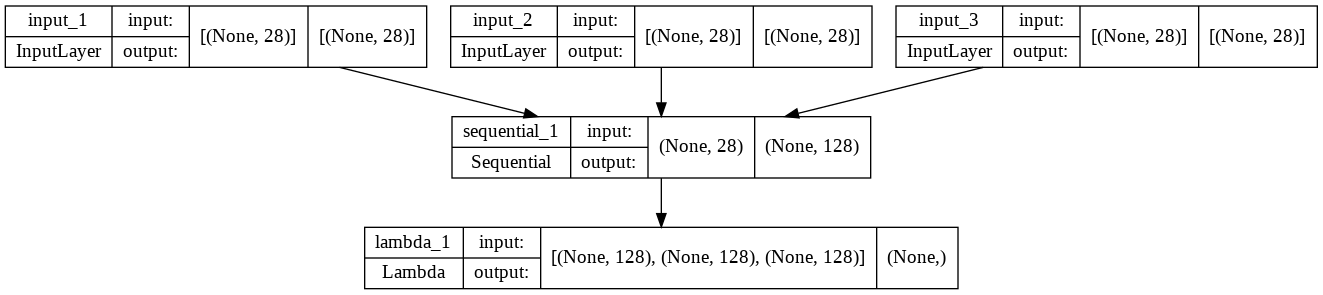

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, to_file='model_summary_3x.png')

In [ ]:
out_emb = model.predict([val[0], val[1], val[2]])

## Обучение модели классификации признаков (полученных после модели с трипленой функцией ошибки)  


In [ ]:
x_emb = base_model.predict(x)

## Xgboost classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf2 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.075, max_features=3, max_depth=12, random_state=0)

In [ ]:
gb_clf2.fit(ap_emb, ap_y)

GradientBoostingClassifier(learning_rate=0.075, max_depth=12, max_features=3,
                           n_estimators=300, random_state=0)

In [ ]:
# metrics info calculate
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.pyplot import figure


def metricsCalc(model):
  y_pred = model.predict(X_test)
  predictions = [round(value) for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print(classification_report(y_test, predictions))
  figure(figsize=(10, 8), dpi=80)
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
  plt.show()

In [ ]:
pred = gb_clf2.predict(val_smal)

In [ ]:
print(classification_report(val[3], pred))

              precision    recall  f1-score   support

         0.0       0.57      0.46      0.51       484
         1.0       0.59      0.49      0.54       524
         2.0       0.51      0.66      0.58       509
         3.0       0.75      0.85      0.80       507
         4.0       0.92      0.87      0.90       495
         5.0       0.94      0.84      0.89       512
         6.0       0.93      0.93      0.93       464
         7.0       0.80      0.87      0.84       505

    accuracy                           0.75      4000
   macro avg       0.75      0.75      0.75      4000
weighted avg       0.75      0.75      0.74      4000



In [ ]:
x_emb.shape

(4588, 64)

## MLP коассификатор


In [ ]:
val[1].shape

(10000, 28)

In [ ]:
optimizer = Adam(learning_rate=0.01)

In [ ]:
mlp_model = tf.keras.models.Sequential([
tf.keras.layers.Dense(256,activation='relu',input_shape=(64,)),
# tf.keras.layers.Dense(256,activation='relu'),
# tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(64,activation='relu'),
tf.keras.layers.Dense(8, activation='softmax')])

In [ ]:
mlp_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = mlp_model.fit(ap_emb, y_categ_train, epochs=10, verbose=1,validation_data = (val_smal, y_categ_test))

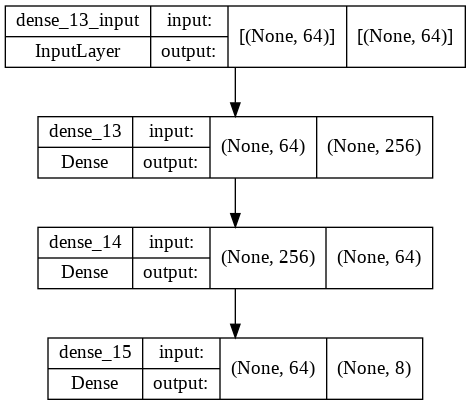

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(mlp_model,show_shapes=True, show_layer_names=True, to_file='model_summary_3x.png')

In [ ]:
pred = mlp_model.predict(val_smal)

In [ ]:
print(classification_report(val[3], pred.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.64      0.49      0.55      1246
         1.0       0.61      0.66      0.63      1241
         2.0       0.69      0.73      0.71      1281
         3.0       0.88      0.89      0.89      1271
         4.0       0.93      0.97      0.95      1205
         5.0       0.89      0.92      0.91      1291
         6.0       0.94      0.94      0.94      1225
         7.0       0.87      0.86      0.86      1240

    accuracy                           0.81     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.80      0.81      0.80     10000



## knn классификация эмбедингов


In [ ]:
error_rate = []
# Will take some time
for i in tqdm(range(1,40)):
 
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(ap_emb, ap_y)  
  pred_i = knn.predict(val_smal)
  error_rate.append(np.mean(pred_i != val[3]))

100%|██████████| 39/39 [16:31<00:00, 25.43s/it]


Text(0, 0.5, 'Error Rate')

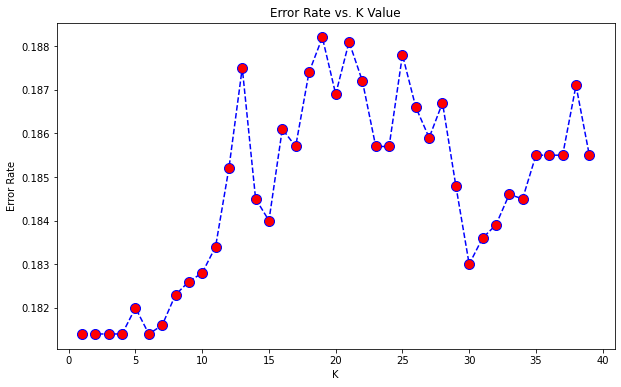

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(ap_emb, ap_y)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pred = neigh.predict(val_smal)

In [ ]:
print(classification_report(val[3], pred))

              precision    recall  f1-score   support

         0.0       0.63      0.49      0.55      1246
         1.0       0.59      0.61      0.60      1241
         2.0       0.70      0.73      0.71      1281
         3.0       0.87      0.89      0.88      1271
         4.0       0.94      0.96      0.95      1205
         5.0       0.86      0.93      0.89      1291
         6.0       0.93      0.96      0.94      1225
         7.0       0.87      0.85      0.86      1240

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



## knn матрица ошибок

In [ ]:
df_out['class'] = pred

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set(rc={'figure.figsize':(12,12)})

In [ ]:
cf_matrix = confusion_matrix(val[3], pred)

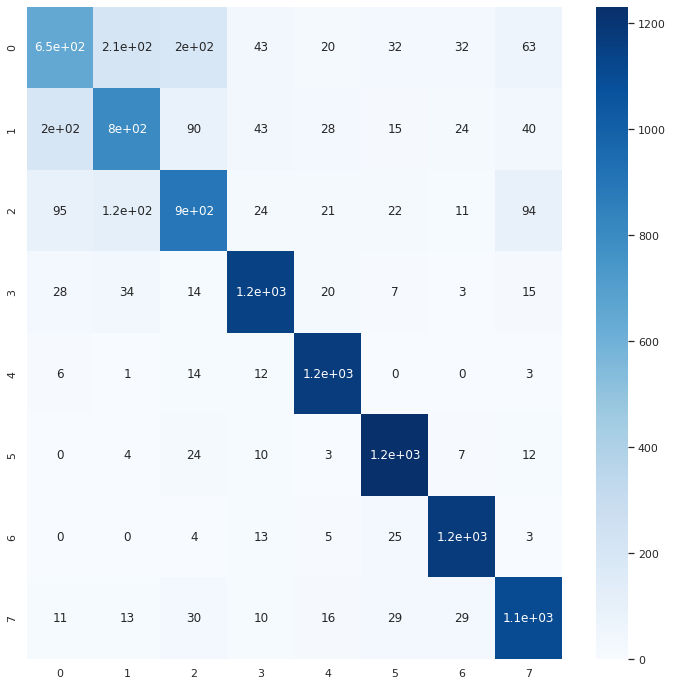

In [ ]:

sns.heatmap(cf_matrix, annot=True, cmap='Blues')